In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from sklearn.datasets import fetch_openml
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA

In [3]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Reshape each image into a column vector
X = mnist.data.T / 255.0 # Scale the data to [0, 1]
Y = mnist.target.astype('int32')

In [26]:
print(X.shape)
print(Y.shape)
print(type(X))

(784, 70000)
(70000,)
<class 'pandas.core.frame.DataFrame'>


In [23]:
# Perform SVD on X
U, s, V = np.linalg.svd(X, full_matrices=False)

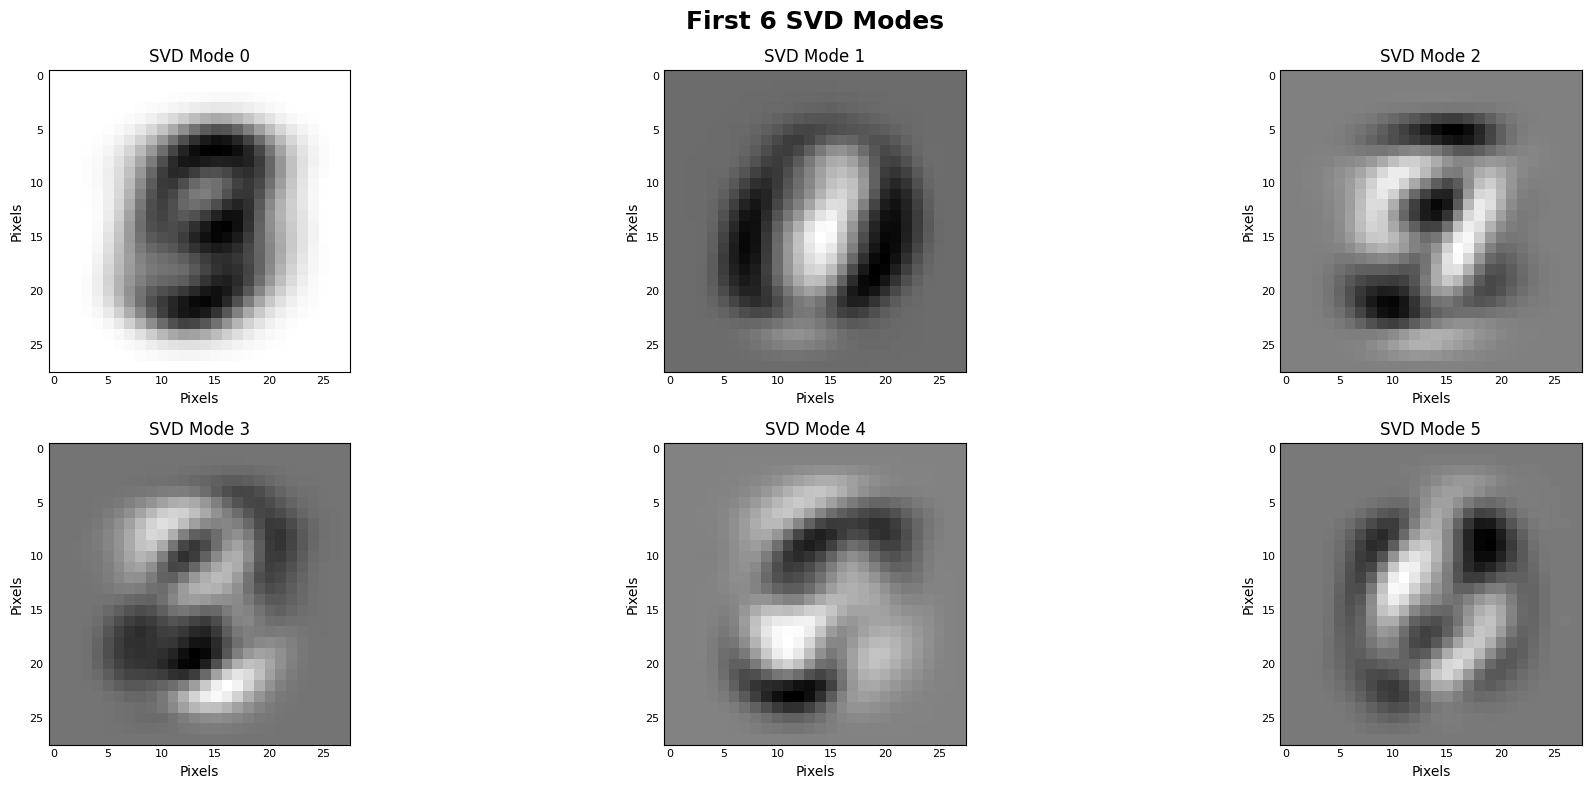

In [25]:
# Plot the first n SVD modes
n = 6
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))

# Iterate over the first n SVD modes
for i in range(n):
    r, c = divmod(i, n_cols)
    ax = axs[r, c]
    
    # Plot the mode as an image
    im = ax.imshow(U[:, i].reshape((28, 28)), cmap='gray')
    
    # Add title and turn off tick labels
    ax.set_title(f'SVD Mode {i}')
    ax.tick_params(axis='both', labelsize=8, length=0)
    
    # Add x and y labels with ticks
    ax.set_xlabel('Pixels', fontsize=10)
    ax.set_ylabel('Pixels', fontsize=10)
    plt.setp(ax.get_xticklabels(), fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)

fig.suptitle(f'First {n} SVD Modes', fontsize=18, fontweight='bold')
fig.tight_layout()
plt.show()

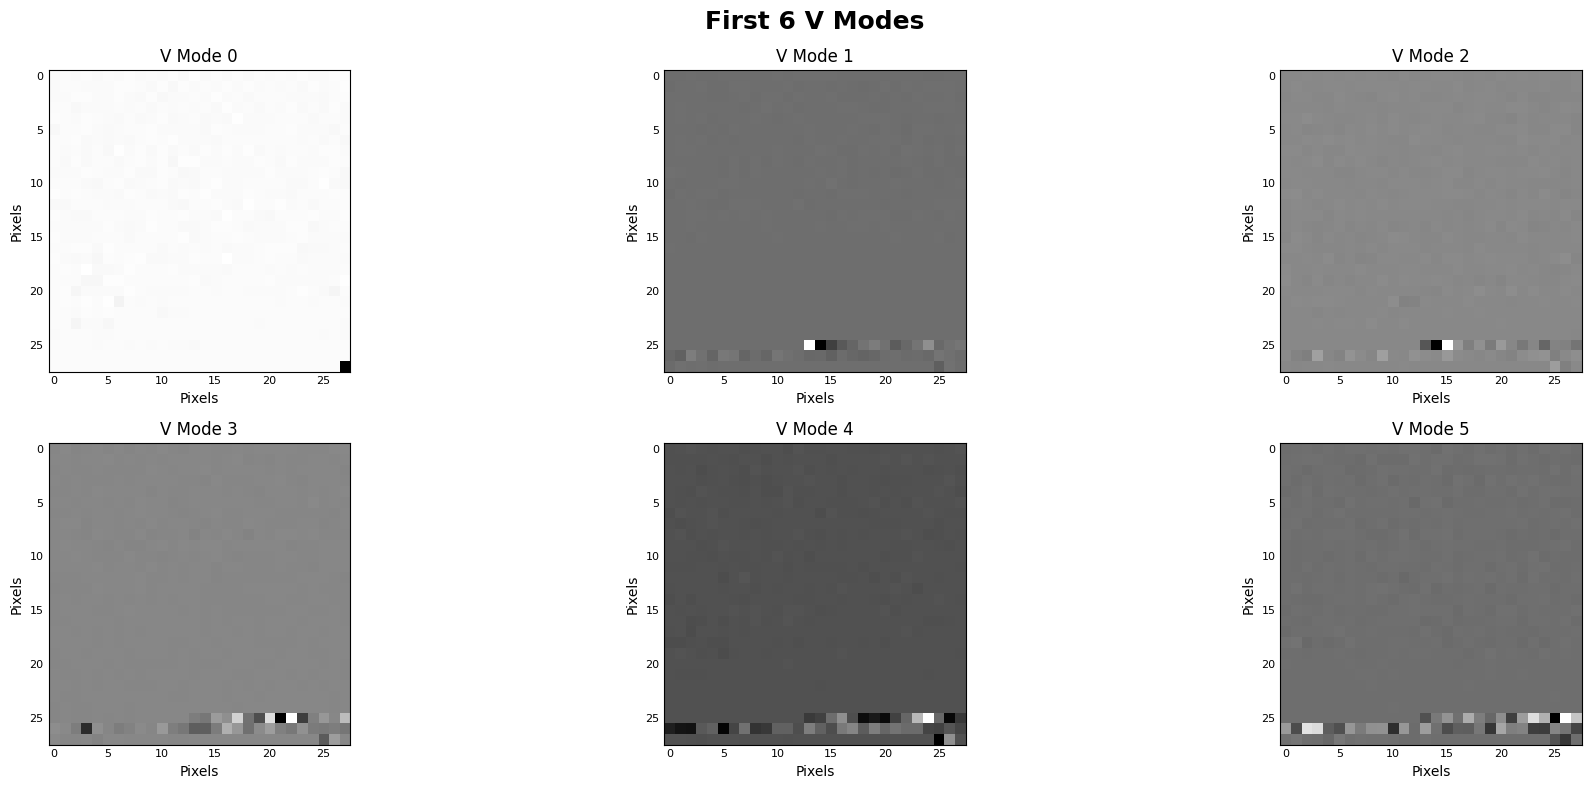

In [26]:
# Plot the first n V modes
n = 6
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))

# Iterate over the first n SVD modes
for i in range(n):
    r, c = divmod(i, n_cols)
    ax = axs[r, c]
    
    # Plot the mode as an image
    im = ax.imshow(V[:, i].T.reshape((28, 28)), cmap='gray')
    
    # Add title and turn off tick labels
    ax.set_title(f'V Mode {i}')
    ax.tick_params(axis='both', labelsize=8, length=0)
    
    # Add x and y labels with ticks
    ax.set_xlabel('Pixels', fontsize=10)
    ax.set_ylabel('Pixels', fontsize=10)
    plt.setp(ax.get_xticklabels(), fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)

fig.suptitle(f'First {n} V Modes', fontsize=18, fontweight='bold')
fig.tight_layout()
plt.show()


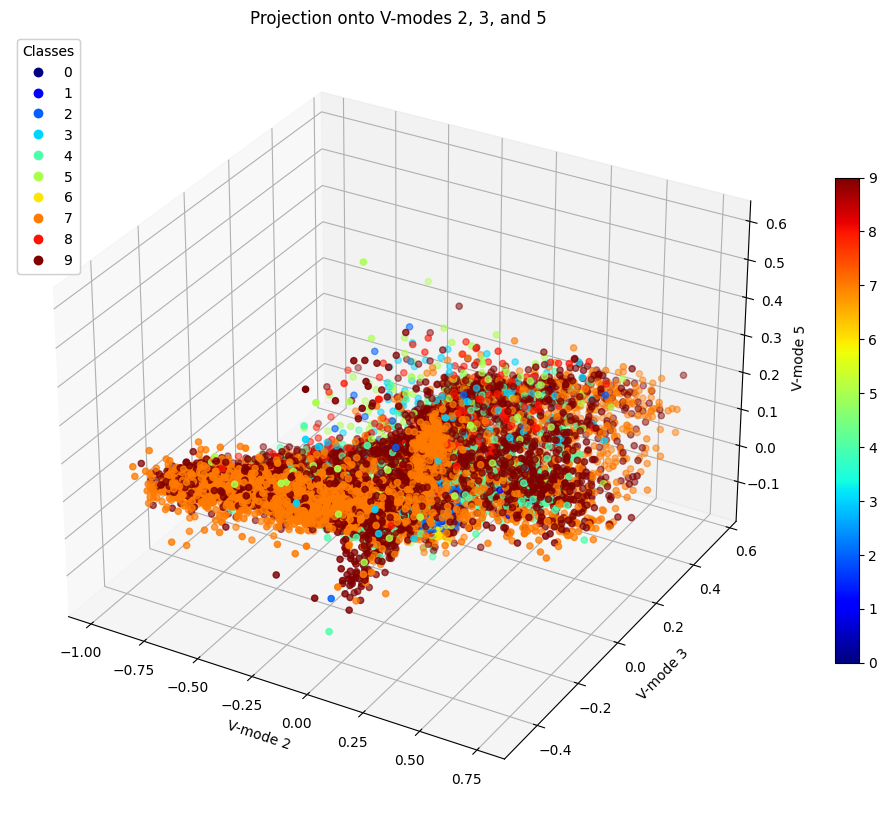

In [31]:
# Select the V-modes to use
v_modes = [2, 3, 5]

# Project the data onto the selected V-modes
X_projected = V[:, v_modes].T @ X.values

# Create a 3D plot with a larger size
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the projected data with a legend
scatter = ax.scatter(X_projected[0, :], X_projected[1, :], X_projected[2, :], c=Y.astype(int), cmap='jet')
legend = ax.legend(*scatter.legend_elements(), title='Classes', loc='upper left')
ax.add_artist(legend)

# Add axis labels
ax.set_xlabel(f'V-mode {v_modes[0]}')
ax.set_ylabel(f'V-mode {v_modes[1]}')
ax.set_zlabel(f'V-mode {v_modes[2]}')

ax.set_title('Projection onto V-modes 2, 3, and 5')

# Add a color bar
fig.colorbar(scatter, shrink=0.5)

# Show the plot
plt.tight_layout()
plt.show()

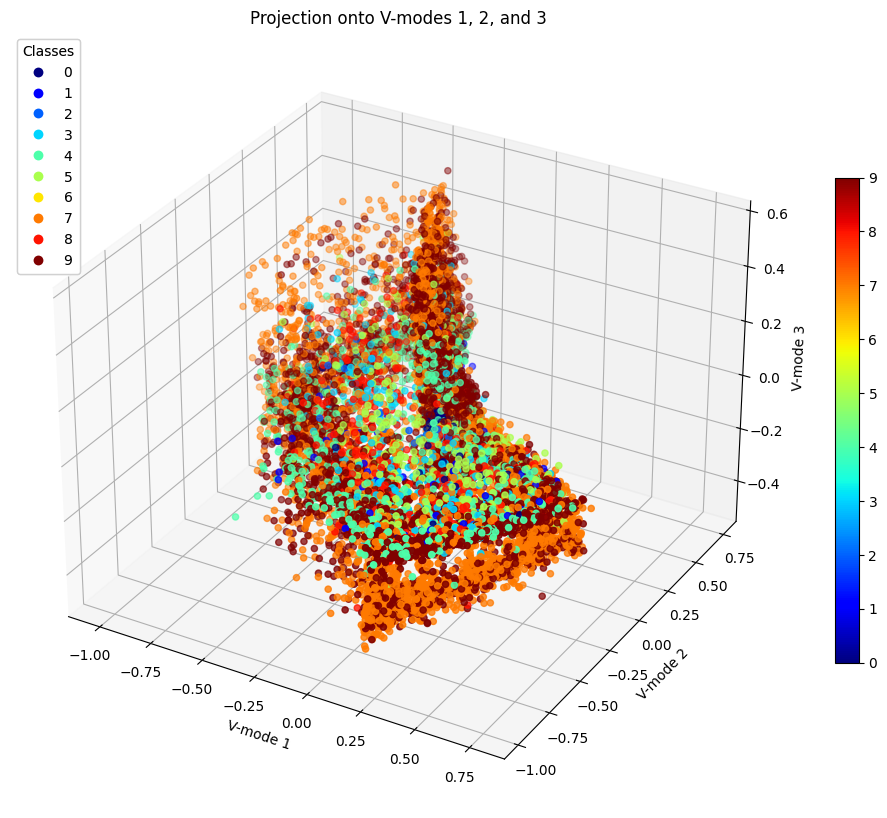

In [27]:
# Select the V-modes to use
v_modes = [1, 2, 3]

# Project the data onto the selected V-modes
X_projected = V[:, v_modes].T @ X.values

# Create a 3D plot with a larger size
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the projected data with a legend
scatter = ax.scatter(X_projected[0, :], X_projected[1, :], X_projected[2, :], c=Y.astype(int), cmap='jet')
legend = ax.legend(*scatter.legend_elements(), title='Classes', loc='upper left')
ax.add_artist(legend)

# Add axis labels
ax.set_xlabel(f'V-mode {v_modes[0]}')
ax.set_ylabel(f'V-mode {v_modes[1]}')
ax.set_zlabel(f'V-mode {v_modes[2]}')

ax.set_title('Projection onto V-modes 1, 2, and 3')

# Add a color bar
fig.colorbar(scatter, shrink=0.5)

# Show the plot
plt.tight_layout()
plt.show()


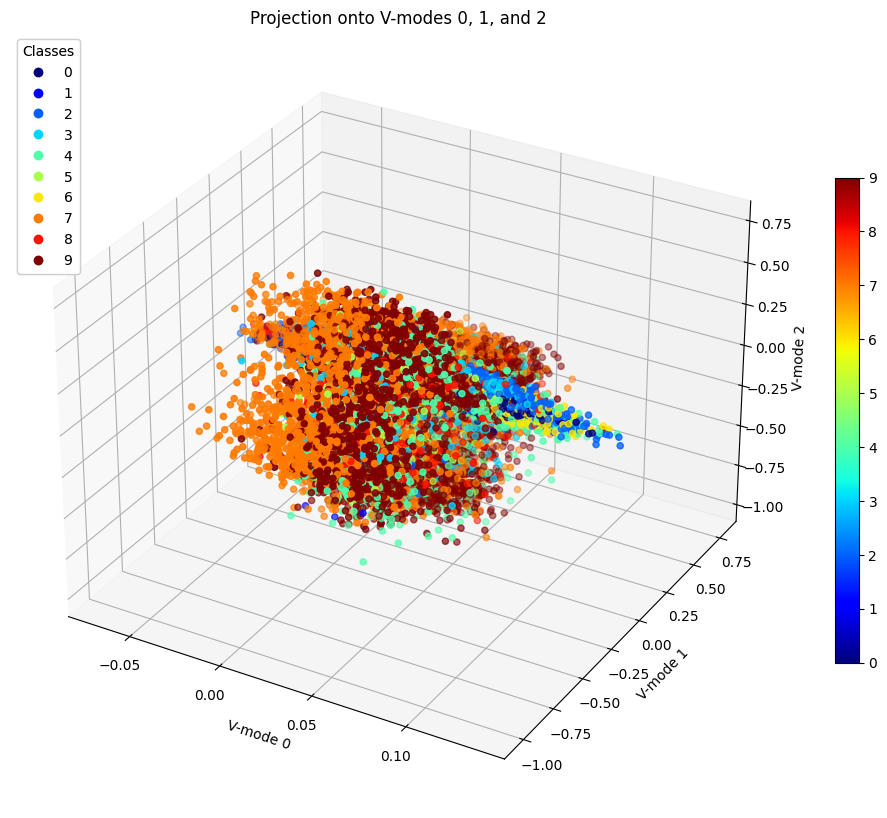

In [28]:
# Select the V-modes to use
v_modes = [0, 1, 2]

# Project the data onto the selected V-modes
X_projected = V[:, v_modes].T @ X.values

# Create a 3D plot with a larger size
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the projected data with a legend
scatter = ax.scatter(X_projected[0, :], X_projected[1, :], X_projected[2, :], c=Y.astype(int), cmap='jet')
legend = ax.legend(*scatter.legend_elements(), title='Classes', loc='upper left')
ax.add_artist(legend)

# Add axis labels
ax.set_xlabel(f'V-mode {v_modes[0]}')
ax.set_ylabel(f'V-mode {v_modes[1]}')
ax.set_zlabel(f'V-mode {v_modes[2]}')

ax.set_title('Projection onto V-modes 0, 1, and 2')

# Add a color bar
fig.colorbar(scatter, shrink=0.5)

# Show the plot
plt.tight_layout()
plt.show()

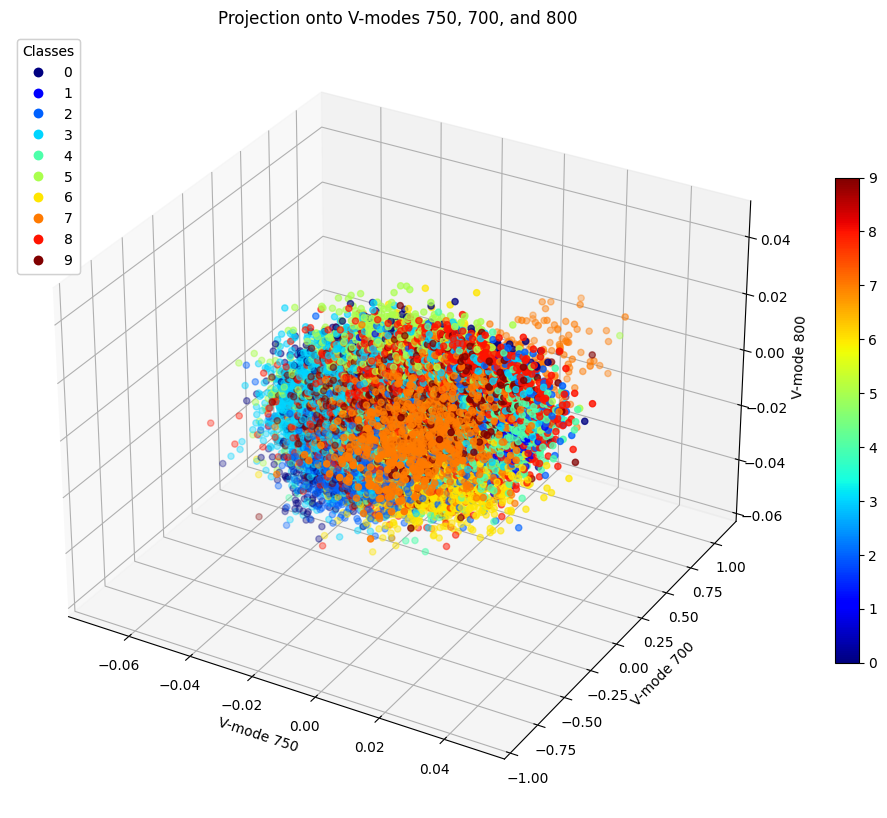

In [29]:
# Select the V-modes to use
v_modes = [750, 700, 800]

# Project the data onto the selected V-modes
X_projected = V[:, v_modes].T @ X.values

# Create a 3D plot with a larger size
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the projected data with a legend
scatter = ax.scatter(X_projected[0, :], X_projected[1, :], X_projected[2, :], c=Y.astype(int), cmap='jet')
legend = ax.legend(*scatter.legend_elements(), title='Classes', loc='upper left')
ax.add_artist(legend)

# Add axis labels
ax.set_xlabel(f'V-mode {v_modes[0]}')
ax.set_ylabel(f'V-mode {v_modes[1]}')
ax.set_zlabel(f'V-mode {v_modes[2]}')

ax.set_title('Projection onto V-modes 750, 700, and 800')

# Add a color bar
fig.colorbar(scatter, shrink=0.5)

# Show the plot
plt.tight_layout()
plt.show()

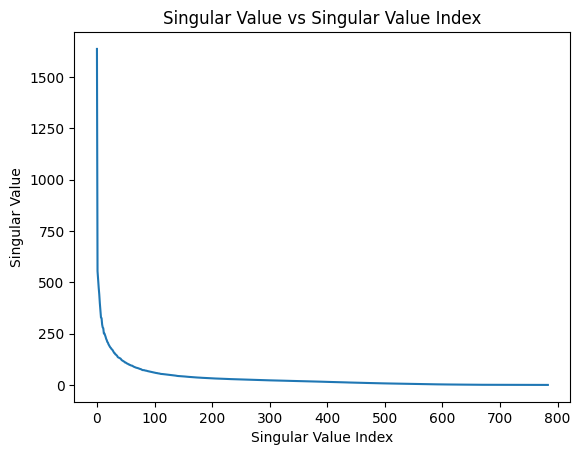

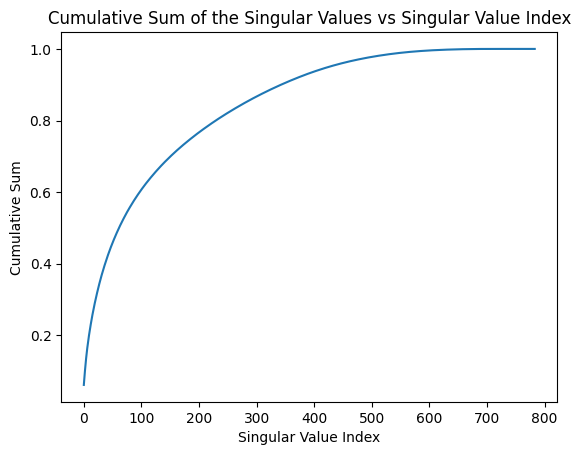

In [35]:
# Plot the singular value spectrum
plt.plot(s)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title("Singular Value vs Singular Value Index")
plt.show()


# Plot the cumulative sum of the singular values
plt.plot(np.cumsum(s)/np.sum(s))
plt.xlabel('Singular Value Index')
plt.ylabel('Cumulative Sum')
plt.title("Cumulative Sum of the Singular Values vs Singular Value Index")

plt.show()


In [36]:
# Set the threshold for the amount of variance to retain
threshold = 0.56

# Calculate the number of dimensions to keep
k = np.argmax(np.cumsum(s) >= threshold*np.sum(s)) + 1

# Calculate the number of singular values greater than s[k-1] (where k is the number of dimensions to keep)
r = np.sum(s > s[k-1])

# Print the number of dimensions and the number of retained singular values
print('k:', k)
print('r:', r)

k: 82
r: 81


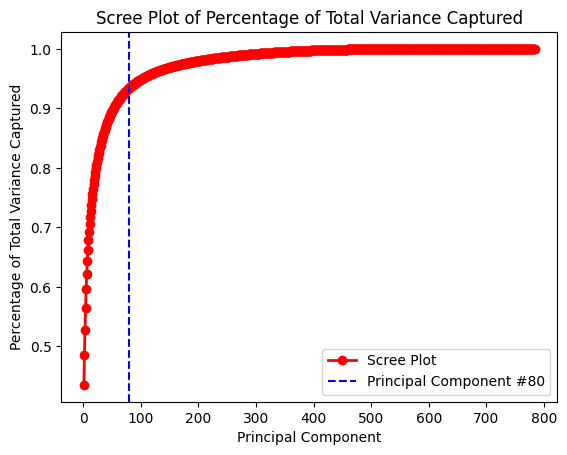

In [42]:
# calculate the cumulative sum of the squared singular values
cumulative_sum = np.cumsum(s**2)

# calculate the percentage of total variance captured by each singular value
variance_explained = cumulative_sum / np.sum(s**2)

# plot the scree plot
plt.plot(np.arange(1, len(s)+1), variance_explained, 'ro-', linewidth=2, label='Scree Plot')
plt.axvline(x=80, color='b', linestyle='--', label='Principal Component #80')
plt.title('Scree Plot of Percentage of Total Variance Captured')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Total Variance Captured')
plt.legend()
plt.show()

In [5]:
# LDA for 2 digits

# Transpose the data X for easier filtering using Boolean logic
Xt = X.T
 
# Perform PCA on the original dataset to reduce dimensionality to 80 components
pca = PCA(n_components=10)
pca.fit(Xt)
X_pca = pca.transform(Xt)

# Select only 4s and 9s in the new PCA space
X_pca_49 = X_pca[(Y == 4) | (Y == 9)]
Y_pca_49 = Y[(Y == 4) | (Y == 9)]

# Split into training and testing sets
X_pca_train, X_pca_test, Y_pca_train, Y_pca_test = train_test_split(X_pca_49, Y_pca_49, test_size=0.2, random_state=42)

# Train an LDA model on the training set using the transformed data
lda_pca = LinearDiscriminantAnalysis()
lda_pca.fit(X_pca_train, Y_pca_train)

# Make predictions on the testing set
Y_pca_pred = lda_pca.predict(X_pca_test)

# Evaluate the accuracy of the classifier
accuracy_LDA2_pca = accuracy_score(Y_pca_test, Y_pca_pred)
print(f"Accuracy: {accuracy_LDA2_pca:.2f}")

Accuracy: 0.84


In [43]:
# LDA for 3 digits
# Select only 0s and 8s and 9s
X_089 = X_pca[(Y == 0) | (Y == 8) | (Y == 9)]
Y_089 = Y[(Y == 0) | (Y == 8) | (Y == 9)]

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_089, Y_089, test_size=0.2, random_state=42)

# Train an LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Make predictions on the testing set
Y_pred = lda.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_LDA3 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy_LDA3:.2f}")

Accuracy: 0.94


In [15]:
from itertools import combinations

# Define the list of digits to use
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Initialize a list to store the accuracies and corresponding digit pairs
results = []

# Loop over all pairs of digits
for digit1, digit2 in combinations(digits, 2):
    
    # Select the data for the current pair of digits
    X_pair = X_pca[(Y == digit1) | (Y == digit2)]
    Y_pair = Y[(Y == digit1) | (Y == digit2)]
    
    # Split into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_pair, Y_pair, test_size=0.2, random_state=42)
    
    # Train an LDA model
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, Y_train)
    
    # Make predictions on the testing set
    Y_pred = lda.predict(X_test)
    
    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Append the digit pair and accuracy to the results list
    results.append((digit1, digit2, accuracy))


In [16]:
# sort the results
sorted_results = sorted(results, key=lambda x: x[2], reverse=True)
# Print the sorted list of results
for result in sorted_results:
    print(f"Digits: ({result[0]}, {result[1]})\tAccuracy: {result[2]:.2f}")

Digits: (0, 1)	Accuracy: 1.00
Digits: (6, 7)	Accuracy: 1.00
Digits: (6, 9)	Accuracy: 0.99
Digits: (1, 4)	Accuracy: 0.99
Digits: (0, 4)	Accuracy: 0.99
Digits: (1, 5)	Accuracy: 0.98
Digits: (0, 7)	Accuracy: 0.98
Digits: (3, 6)	Accuracy: 0.98
Digits: (3, 4)	Accuracy: 0.98
Digits: (6, 8)	Accuracy: 0.98
Digits: (0, 8)	Accuracy: 0.98
Digits: (1, 9)	Accuracy: 0.98
Digits: (1, 7)	Accuracy: 0.98
Digits: (4, 6)	Accuracy: 0.98
Digits: (0, 9)	Accuracy: 0.98
Digits: (1, 6)	Accuracy: 0.98
Digits: (1, 3)	Accuracy: 0.97
Digits: (0, 6)	Accuracy: 0.97
Digits: (4, 8)	Accuracy: 0.97
Digits: (2, 9)	Accuracy: 0.97
Digits: (5, 7)	Accuracy: 0.97
Digits: (3, 7)	Accuracy: 0.97
Digits: (1, 2)	Accuracy: 0.97
Digits: (0, 3)	Accuracy: 0.97
Digits: (4, 5)	Accuracy: 0.97
Digits: (2, 7)	Accuracy: 0.97
Digits: (7, 8)	Accuracy: 0.97
Digits: (0, 2)	Accuracy: 0.97
Digits: (2, 4)	Accuracy: 0.96
Digits: (4, 7)	Accuracy: 0.96
Digits: (5, 9)	Accuracy: 0.96
Digits: (5, 6)	Accuracy: 0.95
Digits: (3, 9)	Accuracy: 0.95
Digits: (2

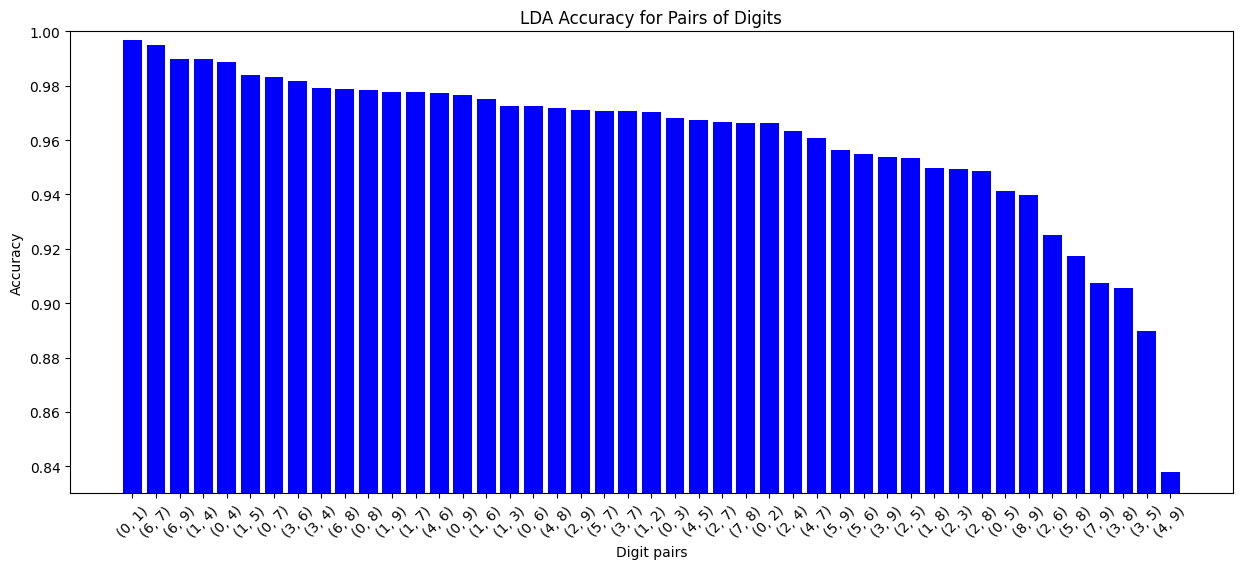

In [17]:
# Extract the digits and accuracies into separate lists
digits = [(result[0], result[1]) for result in sorted_results]
accuracies = [result[2] for result in sorted_results]

# Create a bar plot of the accuracies
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(accuracies)), accuracies, color='blue')
plt.xlabel('Digit pairs')
plt.ylabel('Accuracy')
plt.title('LDA Accuracy for Pairs of Digits')
plt.ylim(0.83, 1.0)  # Set y-axis limits
plt.xticks(np.arange(len(accuracies)), digits, rotation=45)
plt.show()


In [8]:
#Split the data into training and testing sets
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

#Scale the data using a standard scaler
scaler = StandardScaler() 
X_train_SVM = scaler.fit_transform(X_train_SVM) 
X_test_SVM = scaler.transform(X_test_SVM)

#Initialize an SVM classifier
svm = SVC(kernel='rbf', C=1, gamma='auto')

# Train the classifier on the training set
svm.fit(X_train_SVM, y_train_SVM)

# Make predictions on the testing set
y_pred_SVM = svm.predict(X_test_SVM)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_SVM, y_pred_SVM) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [9]:
# Split the data into training and testing sets
X_train_DTC, X_test_DTC, y_train_DTC, y_test_DTC = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Train a decision tree classifier with default hyperparameters
clf = DecisionTreeClassifier()
clf.fit(X_train_DTC, y_train_DTC)

# Make predictions on the testing set
y_pred_DTC = clf.predict(X_test_DTC)

# Evaluate the accuracy of the classifier
accuracy_DTC = accuracy_score(y_test_DTC, y_pred_DTC)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


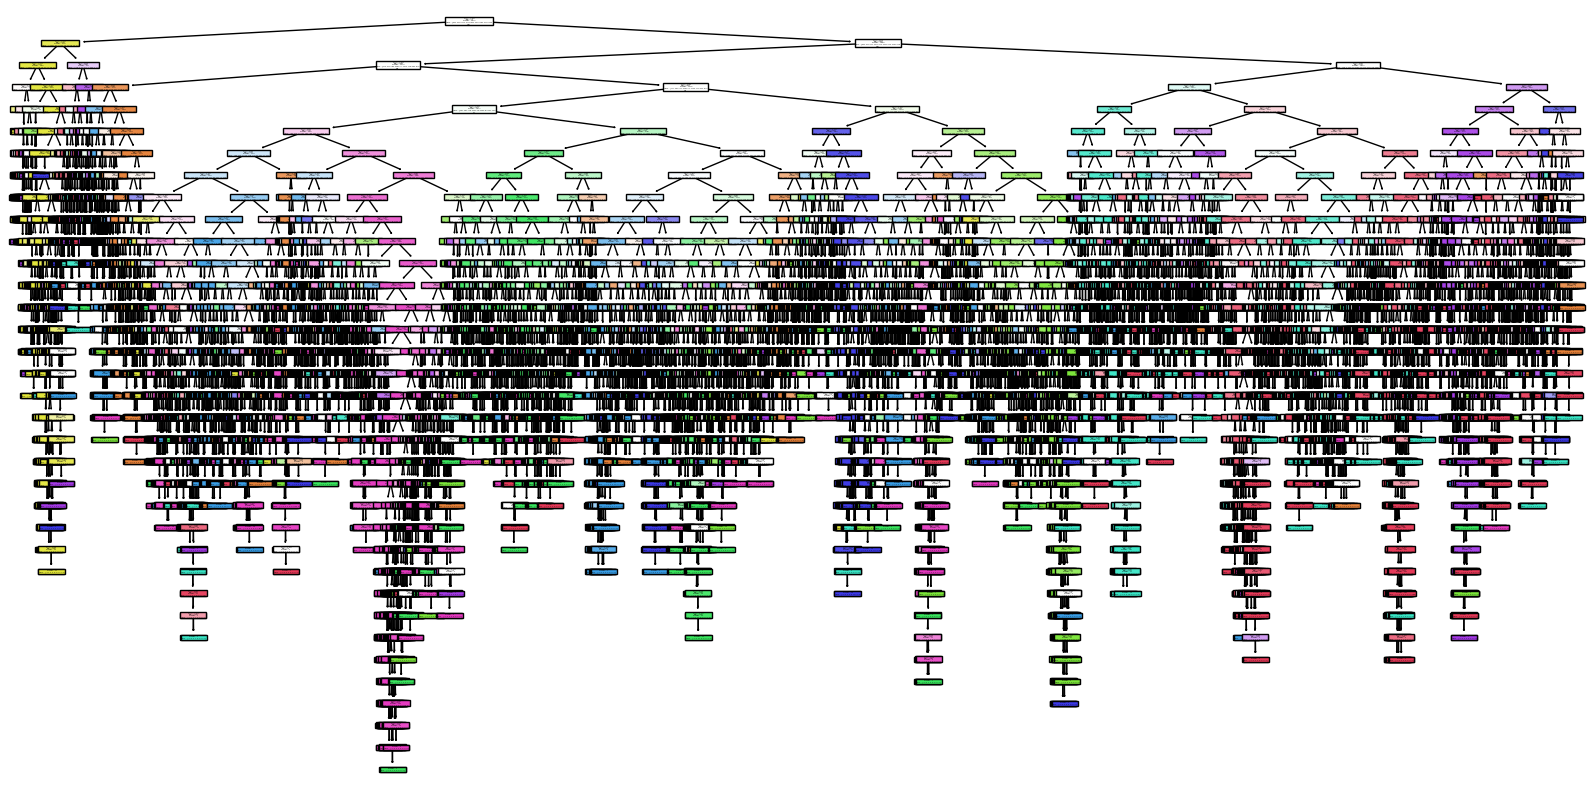

In [49]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.show()


In [50]:
# Split the data into training and testing sets
X_train_DTC, X_test_DTC, y_train_DTC, y_test_DTC = train_test_split(X_pca[:50], Y[:50], test_size=0.2, random_state=42)

# Train a decision tree classifier with default hyperparameters
clf = DecisionTreeClassifier()
clf.fit(X_train_DTC, y_train_DTC)

# Make predictions on the testing set
y_pred_DTC = clf.predict(X_test_DTC)

# Evaluate the accuracy of the classifier
accuracy_DTC = accuracy_score(y_test_DTC, y_pred_DTC)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


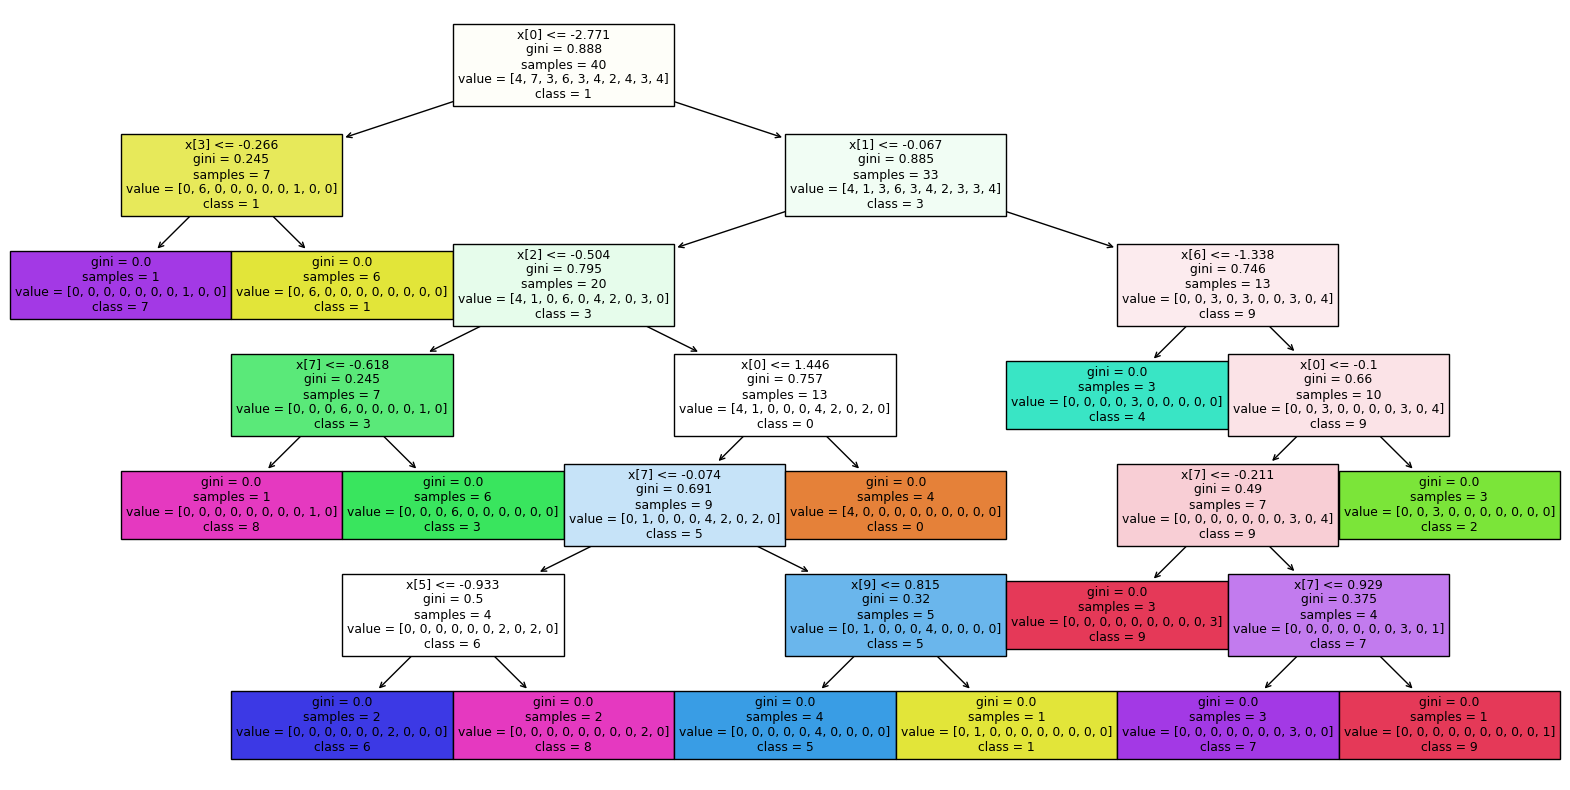

In [51]:
# Define the class names
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, class_names=class_names)
plt.show()

In [6]:
# Hardest pair: (4,9)
# Easiest pair: (1,0)
# Select only 4s and 9s
X_49 = X_pca[(Y == 4) | (Y == 9)]
Y_49 = Y[(Y == 4) | (Y == 9)]

# Split the data into training and testing sets
X_train_SVM_49, X_test_SVM_49, y_train_SVM_49, y_test_SVM_49 = train_test_split(X_49, Y_49, test_size=0.2, random_state=42)

# Scale the data using a standard scaler
scaler_49 = StandardScaler()
X_train_SVM_49 = scaler_49.fit_transform(X_train_SVM_49)
X_test_SVM_49 = scaler_49.transform(X_test_SVM_49)

# Initialize an SVM classifier
svm_49 = SVC(kernel='rbf', C=1, gamma='auto')

# Train the classifier on the training set
svm_49.fit(X_train_SVM_49, y_train_SVM_49)

# Make predictions on the testing set
y_pred_SVM_49 = svm_49.predict(X_test_SVM_49)

# Evaluate the accuracy of the classifier
accuracy_SVM_49 = accuracy_score(y_test_SVM_49, y_pred_SVM_49)
print(f"Accuracy: {accuracy_SVM_49:.2f}")

Accuracy: 0.95


In [10]:
# Split the data into training and testing sets
X_train_DTC_49, X_test_DTC_49, y_train_DTC_49, y_test_DTC_49 = train_test_split(X_49, Y_49, test_size=0.2, random_state=42)

# Train a decision tree classifier with default hyperparameters
clf_49 = DecisionTreeClassifier()
clf_49.fit(X_train_DTC_49, y_train_DTC_49)

# Make predictions on the testing set
y_pred_DTC_49 = clf.predict(X_test_DTC_49)

# Evaluate the accuracy of the classifier
accuracy_DTC_49 = accuracy_score(y_test_DTC_49, y_pred_DTC_49)
print(f"Accuracy: {accuracy_DTC_49:.2f}")

Accuracy: 0.96


In [11]:
X_10 = X_pca[(Y == 1) | (Y == 0)]
Y_10 = Y[(Y == 1) | (Y == 0)]

# Split the data into training and testing sets
X_train_SVM_10, X_test_SVM_10, y_train_SVM_10, y_test_SVM_10 = train_test_split(X_10, Y_10, test_size=0.2, random_state=42)

# Scale the data using a standard scaler
scaler_10 = StandardScaler()
X_train_SVM_10 = scaler_10.fit_transform(X_train_SVM_10)
X_test_SVM_10 = scaler_10.transform(X_test_SVM_10)

# Initialize an SVM classifier
svm_10 = SVC(kernel='rbf', C=1, gamma='auto')

# Train the classifier on the training set
svm_10.fit(X_train_SVM_10, y_train_SVM_10)

# Make predictions on the testing set
y_pred_SVM_10 = svm_10.predict(X_test_SVM_10)

# Evaluate the accuracy of the classifier
accuracy_SVM_10 = accuracy_score(y_test_SVM_10, y_pred_SVM_10)
print(f"Accuracy: {accuracy_SVM_10:.2f}")

Accuracy: 1.00


In [12]:
# Split the data into training and testing sets
X_train_DTC_10, X_test_DTC_10, y_train_DTC_10, y_test_DTC_10 = train_test_split(X_10, Y_10, test_size=0.2, random_state=42)

# Train a decision tree classifier with default hyperparameters
clf_10 = DecisionTreeClassifier()
clf_10.fit(X_train_DTC_10, y_train_DTC_10)

# Make predictions on the testing set
y_pred_DTC_10 = clf.predict(X_test_DTC_10)

# Evaluate the accuracy of the classifier
accuracy_DTC_10 = accuracy_score(y_test_DTC_10, y_pred_DTC_10)
print(f"Accuracy: {accuracy_DTC_10:.2f}")

Accuracy: 0.98


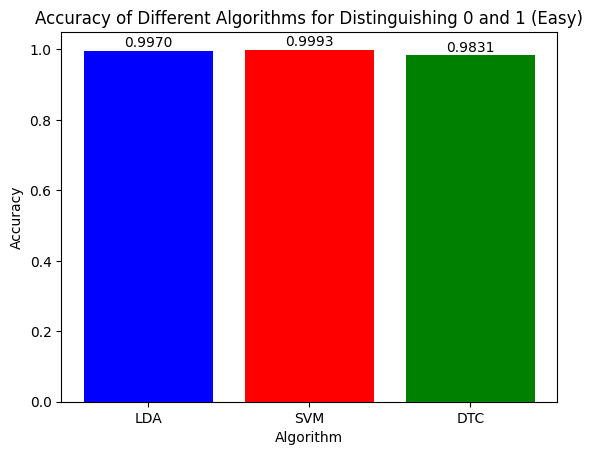

In [21]:
# Set the accuracy values for each algorithm
accuracies_10 = [accuracies[0], accuracy_SVM_10,accuracy_DTC_10]  # LDA, SVM, DTC
algo = ["LDA", "SVM", "DTC"]

# Create a bar plot of the accuracies
plt.bar(algo, accuracies_10, color=['blue', 'red', 'green'])

# Add the accuracy values above each bar
plt.text(0, accuracies_10[0]+0.01, f"{accuracies_10[0]:.4f}", ha='center', fontsize=10)
plt.text(1, accuracies_10[1]+0.01, f"{accuracies_10[1]:.4f}", ha='center', fontsize=10)
plt.text(2, accuracies_10[2]+0.01, f"{accuracies_10[2]:.4f}", ha='center', fontsize=10)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Algorithms for Distinguishing 0 and 1 (Easy)")
plt.show()


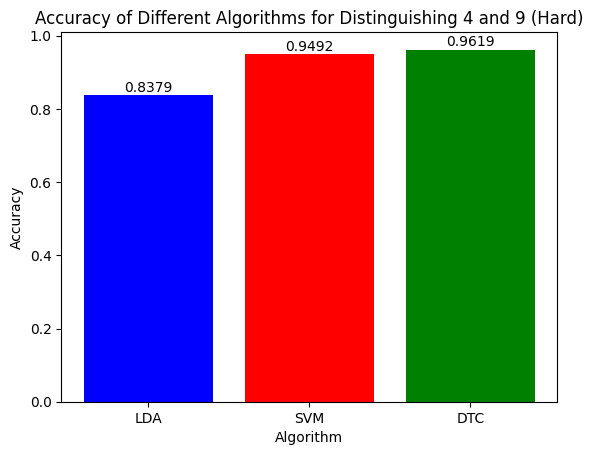

In [20]:
# Set the accuracy values for each algorithm
accuracies_49 = [accuracies[len(accuracies) - 1], accuracy_SVM_49,accuracy_DTC_49]  # LDA, SVM, DTC
algo = ["LDA", "SVM", "DTC"]

# Create a bar plot of the accuracies
plt.bar(algo, accuracies_49, color=['blue', 'red', 'green'])

# Add the accuracy values above each bar
plt.text(0, accuracies_49[0]+0.01, f"{accuracies_49[0]:.4f}", ha='center', fontsize=10)
plt.text(1, accuracies_49[1]+0.01, f"{accuracies_49[1]:.4f}", ha='center', fontsize=10)
plt.text(2, accuracies_49[2]+0.01, f"{accuracies_49[2]:.4f}", ha='center', fontsize=10)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Algorithms for Distinguishing 4 and 9 (Hard)")
plt.show()